In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/image_processing/week3.bmp")
print(img.shape)

Mounted at /content/drive
(225, 225, 3)


In [6]:
def image_quantization(img, bits):
    nr, nc = img.shape[:2]
    retImg = img.copy()
    levels = 2 ** bits
    interval = 256 / levels
    gray_level_interval = 255 / levels
    table = np.zeros(256)

    for k in range(256):
        for l in range(levels):
            if k >= l * interval and l < (l + 1) * interval:
                table[k] = round(l * gray_level_interval)
        for x in range(nr):
            for y in range(nc):
                retImg[x, y] = np.uint8(table[img[x, y]])
    
    return retImg

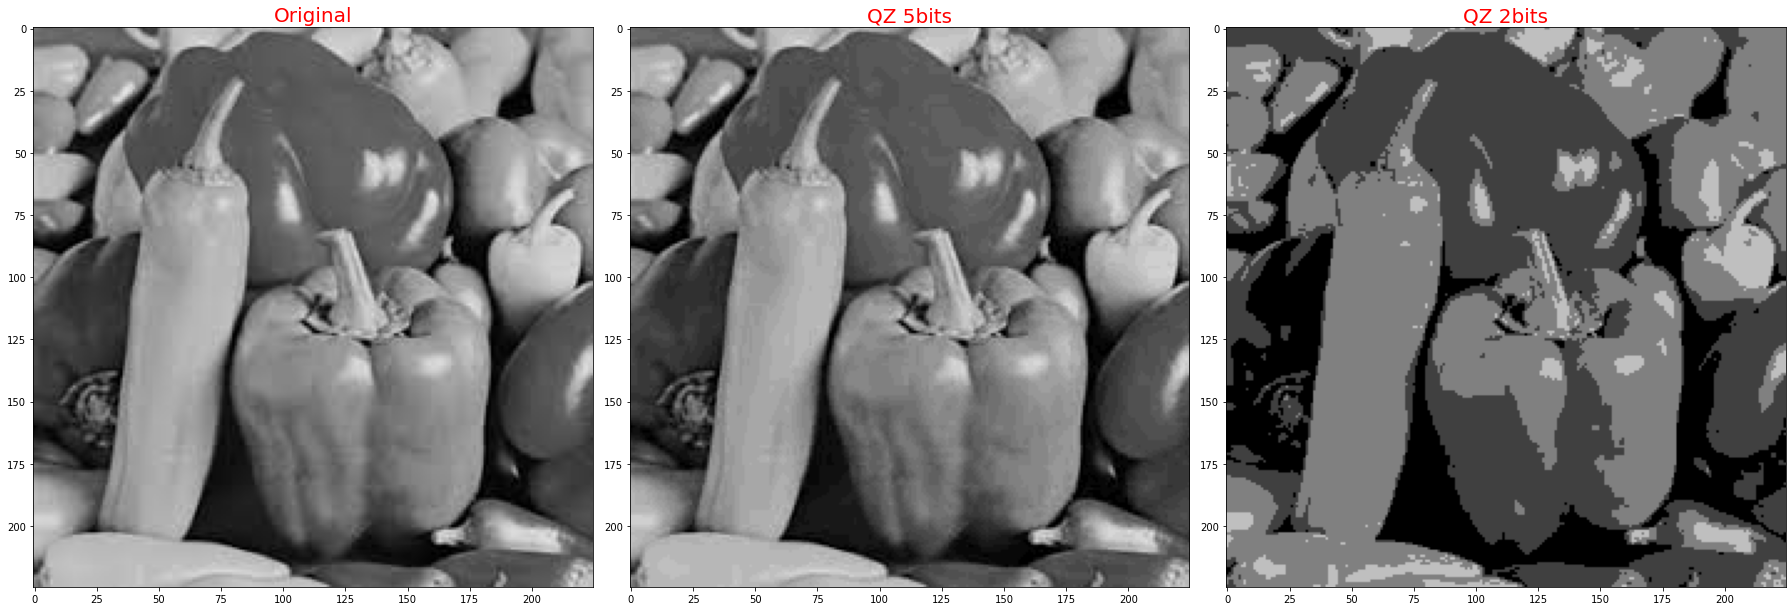

In [7]:
img_5bit = image_quantization(img, 5)
img_2bit = image_quantization(img, 2)
images = [img, img_5bit, img_2bit]
titles = ['Original', 'QZ 5bits', 'QZ 2bits']
plt.figure(figsize = (25, 15))

for i in range(3):
    plt.subplot(1, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize = 20, color = 'r')

plt.tight_layout()
plt.show()